# Exploratory analysis with weather models

## Data preprocessing


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# import the data

table = pd.read_table('final.txt')
# combine and match the current data with weather data around Toronto airport

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL']

def add_month(time):
    for i, m in enumerate (months):
        if m in time:
            return i + 1
def add_day(time):
        return int(time[:2])
            
def add_hour(time):
         return int(time[8:10])
    

### Seperate month day and hour in order to make the match with weather data

In [2]:
table.loc[:,'Month'] = table.apply(lambda table: add_month(table['time']), axis = 1)
table.loc[:,'Day'] = table.apply(lambda table: add_day(table['time']), axis = 1)
table.loc[:,'Time'] = table.apply(lambda table: add_hour(table['time']), axis = 1)

### import weather data

The weather data only contains **hourly** measurement, so when merging the data, between integer hours, the samples share the **same** weather information.

Linear interpolation can be considered if weather data has enough impact on the passing rate. 

In [3]:
file_list = sorted(os.listdir('weather'))
file_list.pop(0)

file1 = pd.read_csv('weather/' + file_list[0])
file2 = pd.read_csv('weather/' + file_list[1])
file3 = pd.read_csv('weather/' + file_list[2])
file4 = pd.read_csv('weather/' + file_list[3])
file5 = pd.read_csv('weather/' + file_list[4])
file6 = pd.read_csv('weather/' + file_list[5])
file7 = pd.read_csv('weather/' + file_list[6])

whole_weather = pd.concat([file1,file2,file3,file4,file5,file6,file7])

In [4]:

def transfer_time_int(time):
        return int(time[:-3])
whole_weather['Time'] = whole_weather.apply(lambda whole_weather: transfer_time_int(whole_weather['Time']), axis = 1)

In [5]:
# combining weather data and previous data together, matching on 'Month, day and time'
cpl_data = pd.merge(left = table, right = whole_weather, on = ['Month', 'Day', 'Time'])

In [6]:
# data cleaning: taking out NaN value
cpl_data2 = cpl_data.dropna(thresh = 10, axis = 1)

#### Data Cleaning: check if there are Null values in the table. If there are, delete corresponding rows 
Original dataset size: 345465

After cleaning: 344778

In [7]:
cpl_dat = cpl_data2.drop(['Dew Point Temp Flag', 'Rel Hum Flag','Hmdx','Wind Chill', 'Weather'], axis = 1)
print len(cpl_dat)
cpl_dat.dropna(thresh = 1000)
print len(cpl_dat)
cpl_dat.isnull().sum()

345465
345465


time                     0
CY                       0
IP                       0
BL                       0
IRT                      0
FT                       0
IS                       0
PS                       0
HC1                      0
HC2                      0
HC3                      0
HC4                      0
HC5                      0
HC6                      0
HC7                      0
HC8                      0
machine                  0
crossmember              0
cavity                   0
MPV1                     0
MPV2                     0
WF1                      0
WT                       0
WF2                      0
WT2                      0
WF3                      0
WT3                      0
WF4                      0
WT4                      0
WF5                      0
                      ... 
Sn                       0
Zn                       0
Pb                       0
Ni                       0
Cr                       0
Ti                       0
C

In [8]:
cpl_dat = cpl_dat[pd.notnull(cpl_dat['Data Quality'])]
cpl_dat = cpl_dat[pd.notnull(cpl_dat['Wind Dir (10s deg)'])]
cpl_dat = cpl_dat[pd.notnull(cpl_dat['Dew Point Temp (°C)'])]
dat_descr = cpl_dat.describe()

### Check if there are extreme values or outliers in weather features

Humidity;

Temperature;

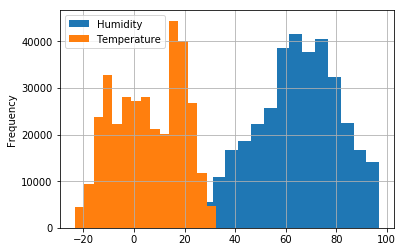

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
cpl_dat['Rel Hum (%)'].hist(bins=15, label = 'Humidity')
cpl_dat['Temp (°C)'].hist(bins=15, label = 'Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('hist_tempHumid.jpg', format = 'jpg', dpi = 500)

345465


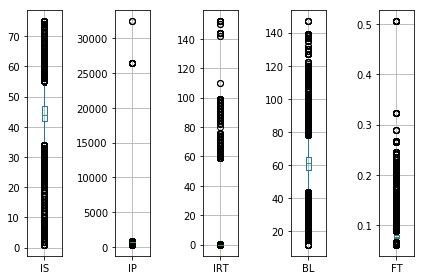

In [23]:
#cpl_dat.boxplot(column = 'Rel Hum (%)')
#cpl_dat.boxplot(column = 'Temp (°C)')
df = cpl_dat
print len(df)
#from scipy import stats
#a = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#df.boxplot(column = 'IP')
#a = df[np.abs(df.IP - df.IP.mean())<=(1*df.IP.std())]



def clean_data(df, column_name):
    q1 = df[column_name].quantile(0.75)
    q2 = df[column_name].quantile(0.25)
    IQR = q1 - q2
    a = df[df[column_name]< q1 + 1.5 * IQR]
    clean = a[a[column_name] > q2 - 1.5 * IQR]
    print ('Cleaned sample size %s' %len(clean))
    return clean
# IP_clean = clean_data(df, 'IP')
# IRT_clean = clean_data(IP_clean,'IRT')
# IS_clean = clean_data(IRT_clean,'IS')
# BL_clean = clean_data(IS_clean, 'BL')
# PS_clean = clean_data(BL_clean,'PS')
# FT_clean = clean_data(PS_clean, 'FT')
# cleaned_dat = FT_clean
plt.subplot(1,5,1)
cpl_dat.boxplot(column = ['IS'])
plt.subplot(1,5,2)
cpl_dat.boxplot(column = 'IP')
plt.subplot(1,5,3)
cpl_dat.boxplot(column = 'IRT')
plt.subplot(1,5,4)
cpl_dat.boxplot(column = 'BL')
plt.subplot(1,5,5)
cpl_dat.boxplot(column = 'FT')
plt.tight_layout()
plt.savefig("outlier.jpg", format = 'jpg', dpi = 500)
#cleaned_dat.to_csv('cleanedData.csv','w')

The box plot indicates that there are not extreme or outlier values for humidity, so that we can proceed our analysis.
The mean value is ; standard deivation is ;

### Dealing with categorical data: Converting Pass/Fail to 1/0

In [11]:
data = cleaned_dat.replace('Pass', 1)
data = data.replace('Fail', 0)

In [12]:
temp1 = data['Result'].value_counts(ascending=True)
print 'Frequency Table for Result:' 
print temp1

temp2 = data.pivot_table(values='Rel Hum (%)',index=['Result'],aggfunc=lambda x: x.mean())
print '\nAverage humidity for pass/fail cases:'
print temp2

temp3 = data.pivot_table(values='Temp (°C)',index=['Result'],aggfunc=lambda x: x.mean())
print '\nAverage temperature for pass/fail cases:'
print temp3

temp4 = data.pivot_table(values='Stn Press (kPa)',index=['Result'],aggfunc=lambda x: x.mean())
print '\nAverage standard pressure for pass/fail cases:'
print temp4

temp5 = data.pivot_table(values='Dew Point Temp (°C)',index=['Result'],aggfunc=lambda x: x.mean())
print '\nDew point temperature for pass/fail cases:'
print temp5

Frequency Table for Result:
0     23583
1    227283
Name: Result, dtype: int64

Average humidity for pass/fail cases:
        Rel Hum (%)
Result             
0         64.776916
1         64.168288

Average temperature for pass/fail cases:
        Temp (°C)
Result           
0        6.557537
1        6.772254

Average standard pressure for pass/fail cases:
        Stn Press (kPa)
Result                 
0             99.596474
1             99.606167

Dew point temperature for pass/fail cases:
        Dew Point Temp (°C)
Result                     
0                 -0.097723
1                 -0.034058


### Explore the passing rate based on humidity/temperature

Now we explore the relationship or change tendency between humidity and passing rate, as well as temperature and passing rate.

We take every 5% change in humidity as one data point, calculating the passing rate.

250866


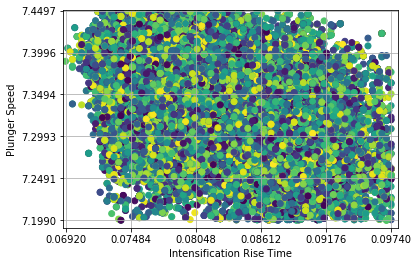

In [13]:
% matplotlib inline

hum_temp = data[['Rel Hum (%)', 'Temp (°C)', 'Dew Point Temp (°C)','IS','IP','BL','PS','IRT','FT','Result']]
print len(hum_temp)
hum = hum_temp.groupby(['Rel Hum (%)'], as_index = False).mean()

hum = hum.groupby(hum.index/5).mean()



# plt.plot(hum['Rel Hum (%)'], hum['Result'])
# plt.xlabel('Humidity (%)')
# plt.ylabel("Passing rate")
# plt.figure(3)
# temp= hum_temp.groupby(['Temp (°C)'], as_index = False).mean()
# print temp['Temp (°C)'].min()
# temp = temp.groupby(temp.index/10).mean()
# print len(temp)
# plt.plot(temp['Temp (°C)'], temp['Result'])
# plt.xlabel('Temperature ')
# plt.ylabel('Passing rate')
# plt.savefig('temp.jpg', format='jpg', dpi=1000)


# plt.figure()
# dew_temp = hum_temp.groupby(['Dew Point Temp (°C)'], as_index = False).mean()
# dew_temp = dew_temp.groupby(np.arange(len(dew_temp))//5).mean()
# plt.plot(dew_temp['Dew Point Temp (°C)'], dew_temp['Result'])
# plt.xlabel('Dew Temp ')
# plt.ylabel('Passing rate')
# plt.tight_layout()
# plt.subplot(231)
# IS = hum_temp.groupby(['IS'], as_index = False).mean()
# #IS = IS.groupby(np.arange(len(IS))//5).mean()
# plt.plot(IS['IS'], IS['Result'])
# plt.xlabel('Intensification stroke ')
# plt.ylabel("Passing rate")



# plt.subplot(232)
# IP = hum_temp.groupby(['IP'], as_index = False).mean()
# #IP = IP.groupby(np.arange(len(IP))//5).mean()
# plt.plot(IP['IP'], IP['Result'])
# plt.xlabel('Intesification pressure')
# plt.ylabel('Passing rate')


# plt.subplot(233)
# BL = hum_temp.groupby(['BL'], as_index = False).mean()
# plt.plot(BL['BL'], BL['Result'])
# plt.xlabel('Biscuit length')
# plt.ylabel('Passing rate')
# plt.tight_layout()

# plt.subplot(234)
# IRT = hum_temp.groupby(['IRT'], as_index = False).mean()
# #IRT = IRT.groupby(np.arange(len(IRT))//5).mean()
# plt.plot(IRT['IRT'],IRT['Result'])
# plt.xlabel('Intensification rise time')
# plt.ylabel('Passing rate')

# plt.subplot(235)
# PS = hum_temp.groupby(['PS'], as_index = False).mean()
# PS = PS.groupby(np.arange(len(PS))//20).mean()
# plt.plot(PS['PS'],PS['Result'])
# plt.xlabel('Plunger speed')
# plt.ylabel('Passing rate')

# plt.subplot(236)
# FT = hum_temp.groupby(['FT'], as_index = False).mean()
# FT = FT.groupby(np.arange(len(FT))//5).mean()
# plt.plot(FT['FT'],FT['Result'])
# plt.xlabel('Fill time')
# plt.ylabel('Passing rate')

plt.savefig('feature_plot.jpg', bbox_inches = 'tight', format = 'jpg', dpi = 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_ticks = np.arange(0.0692, 0.0974, 5.64e-3)
y_ticks = np.arange(7.199, 7.4497, 0.05014)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
a = hum_temp['IRT'].values
b = hum_temp['PS'].values
colors = np.random.rand(len(a))
plt.xlabel('Intensification Rise Time')
plt.ylabel('Plunger Speed')
plt.scatter(a, b, c = colors)
plt.xlim(0.069, 0.098)
plt.ylim(7.19, 7.450)
plt.grid(True)
plt.savefig('grid_BL_FL.jpg', bbox_inches = 'tight', format = 'jpg', dpi = 1000)

In [14]:
#print hum_temp.describe()['IS']
IS = hum_temp.groupby(['IS'], as_index = False).mean()
len(set(hum_temp['BL']))
# IS_aver = IS.groupby(IS.index//4.0).mean()
# print IS_aver

# temp = hum_temp.groupby(['Temp (°C)'], as_index = False).mean()
# temp_aver = temp.groupby(temp.index//106.2).mean()
# print temp_aver

28

In [15]:
# construct filters based on the ranges
def grid_pr(hum_low_r, hum_high_r, temp_low_r, temp_high_r):
    range1 = hum_temp[(hum_temp['IRT'] >= hum_low_r)& (hum_temp['IRT'] <= hum_high_r )
                       &(hum_temp['PS'] >= temp_low_r) & (hum_temp['PS'] <= temp_high_r)] 
    #print range1
    return range1['Result'].mean()
     
    
#print grid_pr(21,36.2,-23.4,-12.22)
print grid_pr(0.09176,0.0974,7.39956, 7.4497)

0.795918367347


Text(0.5,0,u'Passing rate')

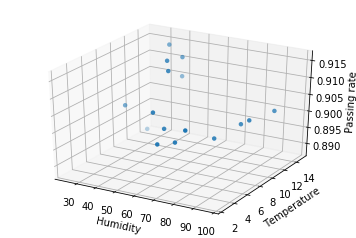

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(hum['Rel Hum (%)'], hum['Temp (°C)'], hum['Result'].values.reshape(-1,1),
                cmap='viridis', edgecolor='none')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
ax.set_zlabel('Passing rate')


NameError: name 'temp' is not defined

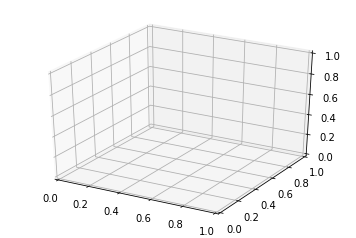

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(temp['Rel Hum (%)'], temp['Temp (°C)'], temp['Result'],
                cmap='viridis', edgecolor='none')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
ax.set_zlabel('Passing rate')
plt.savefig('hum_temp_3D_111.jpg', format = 'jpg', dpi = 1000)

In [ ]:
print hum.iloc[hum['Result'].argmax()]
print dat_descr['Rel Hum (%)']

#### Note

The tendency of passing rate change with the humidity looks like a third order polynomial function. Thus, we can add a new column which contains the squared values of the humidity. Run a linear regression using humidity, humidity squared to find a curve fitting the data points.



In [ ]:
hum_temp

In [ ]:
from sklearn.linear_model import LinearRegression
hum['hum^2'] = hum['Rel Hum (%)'].apply(lambda x: x**2)
hum['hum^3'] = hum['Rel Hum (%)'].apply(lambda x: x**3)
reg_model = LinearRegression()
reg_model.fit(hum[['Rel Hum (%)','hum^2','hum^3']], hum['Result'])
print reg_model.coef_
print(reg_model.intercept_)

In [ ]:
print reg_model.coef_
from matplotlib.patches import Polygon
def quadratic(x):
    return 8.10069262e-03*x -1.39474056e-04*(x**2) + 7.29489788e-07*x**3 + 0.7601324162652251
t1 = np.arange(20, 90, 0.1)
t2 = np.arange(20,30, 0.1)
t3 = np.arange(55,75, 0.1)

def slope1(x):
    return x*0.0024947 + 0.8245095
def slope2(x):
    return x*(-0.00078465) + 0.949
fig, ax = plt.subplots()
plt.plot(t2, slope1(t2),'g', label = 'slope for low humidity',linewidth=3.0)
plt.plot(t3, slope2(t3),'k', label = 'slope for high humidity',linewidth=3.0)
plt.plot(hum['Rel Hum (%)'], hum['Result'],'b',label = 'Data Points' )
plt.plot(t1, quadratic(t1),'r', label = 'Regression Curve')
plt.legend()
plt.xlabel('Humidity (%)')
plt.ylabel("Passing rate")
plt.annotate('Max Value', xy=(44, 0.910), 
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

# Make the shaded region
def fun(x):
    return 0*x + 0.91
ix = np.linspace(42, 46)
iy = fun(ix)
verts = [(42, 0)] + list(zip(ix, iy)) + [(46, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.savefig('humidity.jpg', format='jpg', dpi=1000)

### Conclusion
The relationship between humidity and the passing rate in this dataset can be approximately described as a polynomial function: $y = 7.295\times10^{-7}x^3 - 1.395\times10^{-4}x^2 + 8.101\times10^{-3}$

In [ ]:
from scipy.misc import derivative
print quadratic(65)
derivative(quadratic, 65.0, dx=1e-6)
0.897735682995 + 65* 0.0007846515659437614

In [ ]:
reg_IP = LinearRegression()
reg_IP.fit(IP[['IP']], IP['Result'])
print reg_IP.coef_
print(reg_IP.intercept_)


plt.plot(IP['IP'], IP['Result'],label = 'IP data points')
plt.xlabel('Intesification pressure')
plt.ylabel('Passing rate')
def linear_IP(x):
    return -2.59599347e-06*x + 0.8847675857206858

t2 = np.arange(0, 15000, 1)
plt.plot(t2, linear_IP(t2),'r', label = 'Regression Curve')
plt.legend()

### Note
Because of the imbalanced data, the arbitrary picking would have the accuracy up to **89.794%**. Our following predictive model must be able to beat this rate to be effective. Or we could apply oversampling techniques to generate a balanced dataset.

Just based on the average value, it is hard to tell how the environment humidity and temperature affect the passing rate. We can now assume that the lower the humidity and higher the temperature the better. And it is very unlikely that the passing rate is somehow depending on the standard pressure.


## Creating predictive model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import metrics

def classification(model, X, y):
    print ('Sample size %s' % len(X))
    model.fit(X, y)
    pred_train = model.predict(X) # prediction on training set
    accuracy_train = metrics.accuracy_score(pred_train, y)
    print 'Accuracy %s' %'{0: .3%}'.format(accuracy_train) 
    
    kf = KFold(X.shape[0], n_folds = 5)
    
    error = []
    for train, test in kf:
        train_predictors = X[train]
        train_target = y[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(X[test], y[test]))
    print 'Cross Validation Score %s' %'{0:.3%}'.format(np.mean(error))
    
    #fit the model again so that it can be referred outside the function
    model.fit(X, y)


        
    

Since the dataset is very imbalanced, consider using Adaboost classifier

Standard classifier algorithms like *Decision Tree* and *Logistic Regression* have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.


Need to use the oversampling technique.




In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

data_feed = data.drop(['time', 'machine','crossmember','Type','Data Quality', 'Date/Time','year', 'dielv', 'Month', 'Day', 'Time', 'Year' ], axis = 1)

def smote_sampling(data, predictor):
    sm = SMOTE(random_state=42)
    X = data.loc[:,data.columns != 'Result']
    X = X[predictor]
    y = data['Result']
    X_resampled, y_resampled = SMOTE().fit_sample(X, y)
    print('Oversampled data counts: %s' % sorted(Counter(y_resampled).items()))
    return X_resampled, y_resampled

In [ ]:
outcome_var = 'Result'
# drop irrelevant variables
#data_feed = data.drop(['time', 'machine','crossmember','Type','Data Quality', '\xef\xbb\xbfDate/Time','year', 'dielv', 'Month', 'Day', 'Time', 'Year' ], axis = 1)

predictors = list(data_feed.columns)
predictors.remove('Result')

X1, y1 = smote_sampling(data_feed, predictors)
model = RandomForestClassifier()

classification(model, X1, y1)

Now let's purposefully take out some seemingly __*useless features*__, such as wind speed, wind directions, visibiity, and standard pressure. Intuitively, the training and cross validation accuracy could increase.

In [ ]:
outcome_var1 = 'Result'
predictors = list(data_feed.columns)
predictors.remove('Result')
predictors.remove('Wind Spd (km/h)')
predictors.remove('Wind Dir (10s deg)')
predictors.remove('Visibility (km)')
predictors.remove('Stn Press (kPa)')

X2, y2 = smote_sampling(data_feed, predictors)
model1 = RandomForestClassifier()

#classification(model, X2, y2)

In [ ]:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print featimp

outcome_var1 = 'Result'
predictor = ['IS','Pb','BL','Temp (°C)','Dew Point Temp (°C)','Rel Hum (%)']

X2, y2 = smote_sampling(data_feed, predictor)
model1 = RandomForestClassifier(n_estimators=100)

classification(model1, X2, y2)

**Note**

The result does increase but in very tiny amount. The possible reason could be that compared to other features, the weather features have really minor importance.

Now let's just take the weather features to fit the model.

In [ ]:
dat_descr['IP']

In [ ]:
cpl_dat.boxplot(column = 'FT')